In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [80]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

In [81]:
df=pd.read_csv('/content/drive/MyDrive/clustering/All data clustering/clustering data 1/CC GENERAL.csv')

In [82]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## Dataset info
CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user



In [83]:
df_1=df[[ 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

In [84]:
df_1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [85]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [86]:
df_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [87]:
df_1.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [88]:
# check duplicate values
duplicate = df_1[df_1.duplicated()]
duplicate

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


## Outlier detection

### Using Z-score

In [89]:
import numpy as np 
for column in df_2.columns:
    data = df_2[column]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    z_score= ( data - data.mean() ) / data.std()
    outliers = (data < z_score)
    df_2[column].loc[outliers] = np.nan


In [43]:
df_2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.0,0.083333,0.0,0.0,2.0,1000.0,201.802084,139.509787,0.0,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,NaN,0.000000,0.0,0.000000,NaN,4.0,0.0,7000.0,4103.032597,1072.340217,NaN,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,NaN,NaN,0.000000,0.0,0.0,12.0,7500.0,622.066742,627.284787,0.0,12.0
3,1666.670542,NaN,1499.00,NaN,0.00,205.788017,0.083333,NaN,0.000000,NaN,1.0,1.0,7500.0,0.000000,NaN,0.0,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,NaN,0.000000,0.0,0.0,1.0,1200.0,678.334763,244.791237,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,NaN,0.0,NaN,0.0,0.0,6.0,1000.0,325.594462,48.886365,NaN,NaN
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,NaN,0.0,NaN,0.0,0.0,6.0,1000.0,275.861322,NaN,0.0,NaN
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,NaN,0.0,NaN,0.0,0.0,5.0,1000.0,81.270775,82.418369,NaN,NaN
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.0,0.000000,NaN,2.0,0.0,500.0,52.549959,55.755628,NaN,NaN


## Remove outlier

In [44]:
df_2.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                 5260
ONEOFF_PURCHASES_FREQUENCY          4648
PURCHASES_INSTALLMENTS_FREQUENCY    4722
CASH_ADVANCE_FREQUENCY              4322
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         249
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    3047
TENURE                              1366
dtype: int64

In [45]:
df_2.head(50)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.0,0.083333,0.0,0.0,2.0,1000.0,201.802084,139.509787,0.0,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,NaN,0.000000,0.0,0.000000,NaN,4.0,0.0,7000.0,4103.032597,1072.340217,NaN,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,NaN,NaN,0.000000,0.0,0.0,12.0,7500.0,622.066742,627.284787,0.0,12.0
3,1666.670542,NaN,1499.00,NaN,0.00,205.788017,0.083333,NaN,0.000000,NaN,1.0,1.0,7500.0,0.000000,NaN,0.0,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,NaN,0.000000,0.0,0.0,1.0,1200.0,678.334763,244.791237,0.0,12.0
5,1809.828751,1.000000,1333.28,0.00,NaN,0.000000,NaN,0.0,NaN,0.0,0.0,8.0,1800.0,1400.057770,NaN,0.0,12.0
6,627.260806,1.000000,NaN,NaN,688.38,0.000000,NaN,NaN,NaN,0.0,0.0,NaN,13500.0,NaN,198.065894,NaN,12.0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,NaN,0.0,NaN,0.0,0.0,12.0,2300.0,679.065082,532.033990,0.0,12.0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,NaN,NaN,NaN,0.0,0.0,5.0,7000.0,688.278568,311.963409,0.0,12.0
9,152.225975,NaN,1281.60,1281.60,0.00,0.000000,0.166667,NaN,0.000000,0.0,0.0,3.0,11000.0,1164.770591,100.302262,0.0,12.0


## KNN imputer (Handle missing values)

In [46]:
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(df_2), columns=df_2.columns)
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [47]:
imp_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.000,95.40,0.000000,0.166667,0.0,0.083333,0.0,0.0,2.0,1000.0,201.802084,139.509787,0.0,12.0
1,3202.467416,0.909091,0.00,0.000,0.00,1068.127248,0.000000,0.0,0.000000,0.0,4.0,0.0,7000.0,4103.032597,1072.340217,0.0,12.0
2,2495.148862,1.000000,773.17,773.170,0.00,0.000000,0.134849,0.0,0.000000,0.0,0.0,12.0,7500.0,622.066742,627.284787,0.0,12.0
3,1666.670542,0.981818,1499.00,309.918,0.00,205.788017,0.083333,0.0,0.000000,0.0,1.0,1.0,7500.0,0.000000,1150.801121,0.0,12.0
4,817.714335,1.000000,16.00,16.000,0.00,0.000000,0.083333,0.0,0.000000,0.0,0.0,1.0,1200.0,678.334763,244.791237,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.000,291.12,0.000000,0.233333,0.0,0.055555,0.0,0.0,6.0,1000.0,325.594462,48.886365,0.0,12.0
8946,19.183215,1.000000,300.00,0.000,300.00,0.000000,0.200000,0.0,0.088889,0.0,0.0,6.0,1000.0,275.861322,705.446747,0.0,12.0
8947,23.398673,0.833333,144.40,0.000,144.40,0.000000,0.171212,0.0,0.083333,0.0,0.0,5.0,1000.0,81.270775,82.418369,0.0,12.0
8948,13.457564,0.833333,0.00,0.000,0.00,36.558778,0.000000,0.0,0.000000,0.0,2.0,0.0,500.0,52.549959,55.755628,0.0,12.0


#### Normalized the data

In [129]:
from sklearn.preprocessing import MinMaxScaler
std_imp_data = pd.DataFrame(StandardScaler().fit_transform(imp_data), columns=imp_data.columns)
std_imp_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.0,8.950000e+03,8950.0,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.0,8950.0
mean,2.499304e-16,-6.605815e-15,-2.400191e-15,-4.287024e-15,1.103276e-16,4.881322e-16,-7.558277e-16,0.0,8.095622e-15,0.0,1.269779e-16,-8.219620e-16,2.272794e-15,-2.199110e-16,-5.378689e-17,0.0,0.0
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0,1.000056e+00,0.0,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0,0.0
min,-9.709007e-01,-4.150287e+00,-8.933758e-01,-6.579051e-01,-7.695166e-01,-6.408090e-01,-1.426359e+00,0.0,-5.819348e-01,0.0,-6.704159e-01,-9.596407e-01,-1.366814e+00,-1.191752e+00,-1.157193e+00,0.0,0.0
25%,-8.702818e-01,3.710460e-01,-8.343007e-01,-6.579051e-01,-7.695166e-01,-6.408090e-01,-1.034791e+00,0.0,-5.819348e-01,0.0,-6.704159e-01,-8.636354e-01,-8.655441e-01,-8.088024e-01,-7.779228e-01,0.0,0.0
50%,-2.878295e-01,3.710460e-01,-3.630073e-01,-5.800907e-01,-4.641916e-01,-6.408090e-01,2.128841e-01,0.0,-5.819348e-01,0.0,-6.704159e-01,-2.876039e-01,-4.127841e-01,-3.360130e-01,-4.221418e-01,0.0,0.0
75%,5.522794e-01,3.710460e-01,5.253884e-01,3.180198e-01,5.109406e-01,4.884467e-01,7.806562e-01,0.0,6.821936e-02,0.0,5.037193e-01,4.804382e-01,6.059260e-01,6.699958e-01,6.195580e-01,0.0,0.0
max,2.911303e+00,3.710460e-01,3.200292e+00,3.569912e+00,3.425378e+00,3.403257e+00,2.097746e+00,0.0,4.990832e+00,0.0,3.243368e+00,2.976575e+00,3.015256e+00,2.982017e+00,2.862284e+00,0.0,0.0


# Dimention Reduction using PCA
K-means, DBSCAN and agglomerative clustering, all use the Euclidean distance, which starts to lose its meaning when the number of dimensions starts increasing. so, before using these methods, i am going to reduce the data dimension by using PCA

In [116]:
pca = PCA(n_components=0.9, random_state=42)
pca.fit(std_imp_data)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(std_imp_data), columns=PC_names)


In [117]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.766323,-3.153750,0.450012,1.591742,1.974183,1.361190,0.495676,1.014023,-0.576633
1,-2.904616,2.146922,-0.554099,0.302503,2.067315,-0.892507,-0.309015,1.528473,0.140921
2,0.343612,0.967975,-0.538299,-1.782259,-0.103512,1.296702,0.649777,-0.435476,-0.111276
3,-0.542850,0.710241,0.005711,-1.380177,0.205341,1.344244,0.060880,-0.816626,-0.075328
4,-0.803210,-1.851936,-0.303142,-0.962913,-0.304123,-0.229348,-0.543516,0.193216,0.160741
...,...,...,...,...,...,...,...,...,...
8945,1.332841,-2.432288,1.128891,0.354390,-0.317891,-0.064881,0.511506,0.441850,0.476925
8946,1.174816,-2.128161,2.352389,0.431501,0.000912,0.493849,0.605669,1.150813,-0.266240
8947,1.009441,-3.104988,0.570291,1.587072,1.724205,1.229381,0.489027,0.816569,-0.645214
8948,-1.266035,-2.720800,-1.631218,0.740321,1.046369,0.687233,-1.050102,-0.378164,-0.811456


## Model:  MeanShift

In [118]:
from sklearn.cluster import MeanShift, estimate_bandwidth
X=pca_data
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(pca_data, quantile=0.3)
ms = MeanShift(bandwidth).fit(pca_data)
X['Labels'] = ms.labels_
label=ms.labels_

## Evaluate the Model

In [120]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
print(f'Davies-Bouldin index = {davies_bouldin_score(pca_data, labels)}')
print(f'Silhouette Score = {silhouette_score(pca_data, labels)}')

Davies-Bouldin index = 2.0819718600306745
Silhouette Score = 0.10874830508245421


### Clusters visualization

In [121]:
df_1['LABELS'] = labels # orginal data 
std_imp_data['LABELS'] = labels # normalized data
pca_data['LABELS'] = labels    # data after applying pca

In [122]:
max(pca_data['LABELS'].tolist())

5

In [123]:
df_pca=pd.DataFrame(pca_data)
df_pca.head(50)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Labels,LABELS
0,0.766323,-3.153750,0.450012,1.591742,1.974183,1.361190,0.495676,1.014023,-0.576633,0,1
1,-2.904616,2.146922,-0.554099,0.302503,2.067315,-0.892507,-0.309015,1.528473,0.140921,0,5
2,0.343612,0.967975,-0.538299,-1.782259,-0.103512,1.296702,0.649777,-0.435476,-0.111276,0,0
3,-0.542850,0.710241,0.005711,-1.380177,0.205341,1.344244,0.060880,-0.816626,-0.075328,0,0
4,-0.803210,-1.851936,-0.303142,-0.962913,-0.304123,-0.229348,-0.543516,0.193216,0.160741,0,0
5,0.934755,0.644257,1.043444,-0.369989,-0.205883,0.137157,-1.811209,0.241087,1.059062,0,0
6,2.716500,1.962041,-0.096499,-0.531365,1.262631,-2.114552,0.345032,-1.920334,0.395059,0,0
7,0.879945,-0.576698,1.162467,-0.243100,-0.149918,0.128293,-0.792123,-0.169250,0.808887,0,0
8,0.884387,0.060212,-0.791255,-1.248741,-0.183911,0.552862,0.774197,-0.601384,0.399388,0,0
9,1.483599,0.780100,-2.324155,-1.832322,-0.159904,0.812759,2.432137,-0.478293,0.126753,0,0


In [124]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
dist = 1 - cosine_similarity(pca_data)
pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

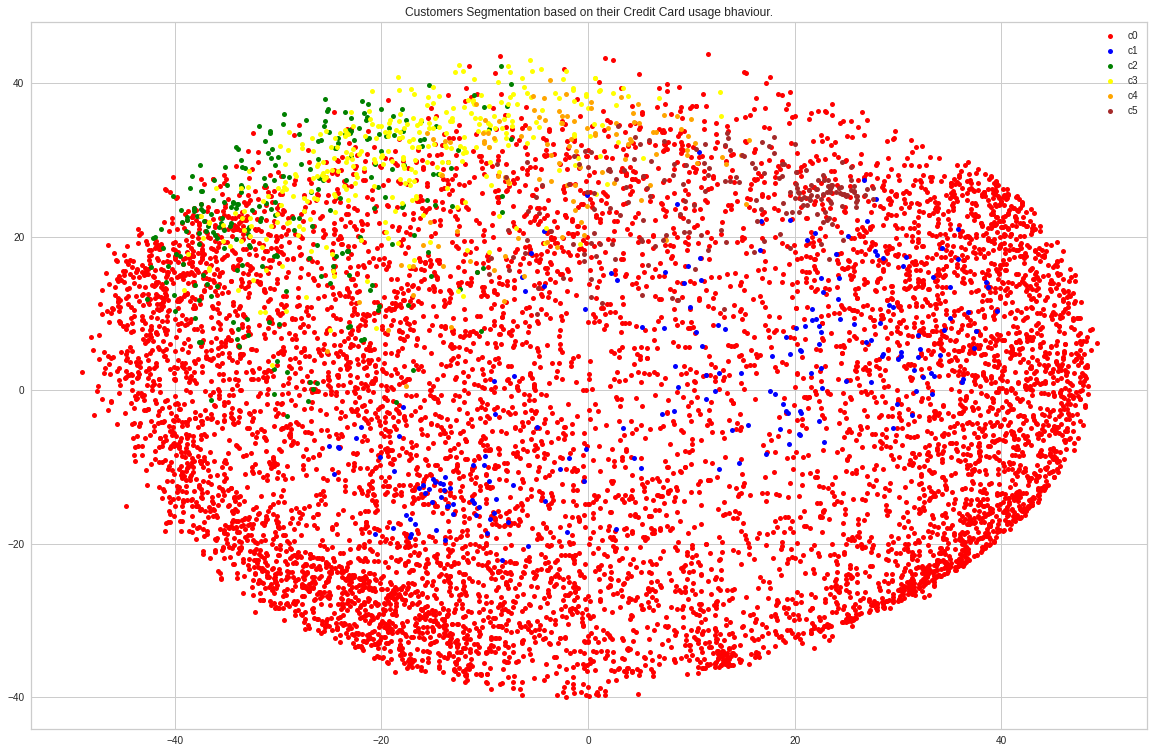

In [125]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5: 'brown',   

          }
names = {0: "c0", 
         1: 'c1', 
         2: 'c2', 
         3: 'c3', 
         4: 'c4',
         5: 'c5',
         }
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

From the above visualization we can see that meanshit algorithm does notn handle the data very well and not able to well defined the actual clusters in the data.

# Hierarchical Clustering

In [130]:
# Data normalization
from sklearn.preprocessing import MinMaxScaler
std_imp_data = pd.DataFrame(StandardScaler().fit_transform(imp_data), columns=imp_data.columns)
std_imp_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.0,8.950000e+03,8950.0,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.0,8950.0
mean,2.499304e-16,-6.605815e-15,-2.400191e-15,-4.287024e-15,1.103276e-16,4.881322e-16,-7.558277e-16,0.0,8.095622e-15,0.0,1.269779e-16,-8.219620e-16,2.272794e-15,-2.199110e-16,-5.378689e-17,0.0,0.0
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0,1.000056e+00,0.0,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0,0.0
min,-9.709007e-01,-4.150287e+00,-8.933758e-01,-6.579051e-01,-7.695166e-01,-6.408090e-01,-1.426359e+00,0.0,-5.819348e-01,0.0,-6.704159e-01,-9.596407e-01,-1.366814e+00,-1.191752e+00,-1.157193e+00,0.0,0.0
25%,-8.702818e-01,3.710460e-01,-8.343007e-01,-6.579051e-01,-7.695166e-01,-6.408090e-01,-1.034791e+00,0.0,-5.819348e-01,0.0,-6.704159e-01,-8.636354e-01,-8.655441e-01,-8.088024e-01,-7.779228e-01,0.0,0.0
50%,-2.878295e-01,3.710460e-01,-3.630073e-01,-5.800907e-01,-4.641916e-01,-6.408090e-01,2.128841e-01,0.0,-5.819348e-01,0.0,-6.704159e-01,-2.876039e-01,-4.127841e-01,-3.360130e-01,-4.221418e-01,0.0,0.0
75%,5.522794e-01,3.710460e-01,5.253884e-01,3.180198e-01,5.109406e-01,4.884467e-01,7.806562e-01,0.0,6.821936e-02,0.0,5.037193e-01,4.804382e-01,6.059260e-01,6.699958e-01,6.195580e-01,0.0,0.0
max,2.911303e+00,3.710460e-01,3.200292e+00,3.569912e+00,3.425378e+00,3.403257e+00,2.097746e+00,0.0,4.990832e+00,0.0,3.243368e+00,2.976575e+00,3.015256e+00,2.982017e+00,2.862284e+00,0.0,0.0


In [132]:
# PCA
import scipy.cluster.hierarchy as shc
pca = PCA(n_components=0.9, random_state=42)
pca.fit(std_imp_data)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(std_imp_data), columns=PC_names)
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.766323,-3.153750,0.450012,1.591742,1.974183,1.361190,0.495676,1.014023,-0.576633
1,-2.904616,2.146922,-0.554099,0.302503,2.067315,-0.892507,-0.309015,1.528473,0.140921
2,0.343612,0.967975,-0.538299,-1.782259,-0.103512,1.296702,0.649777,-0.435476,-0.111276
3,-0.542850,0.710241,0.005711,-1.380177,0.205341,1.344244,0.060880,-0.816626,-0.075328
4,-0.803210,-1.851936,-0.303142,-0.962913,-0.304123,-0.229348,-0.543516,0.193216,0.160741
...,...,...,...,...,...,...,...,...,...
8945,1.332841,-2.432288,1.128891,0.354390,-0.317891,-0.064881,0.511506,0.441850,0.476925
8946,1.174816,-2.128161,2.352389,0.431501,0.000912,0.493849,0.605669,1.150813,-0.266240
8947,1.009441,-3.104988,0.570291,1.587072,1.724205,1.229381,0.489027,0.816569,-0.645214
8948,-1.266035,-2.720800,-1.631218,0.740321,1.046369,0.687233,-1.050102,-0.378164,-0.811456


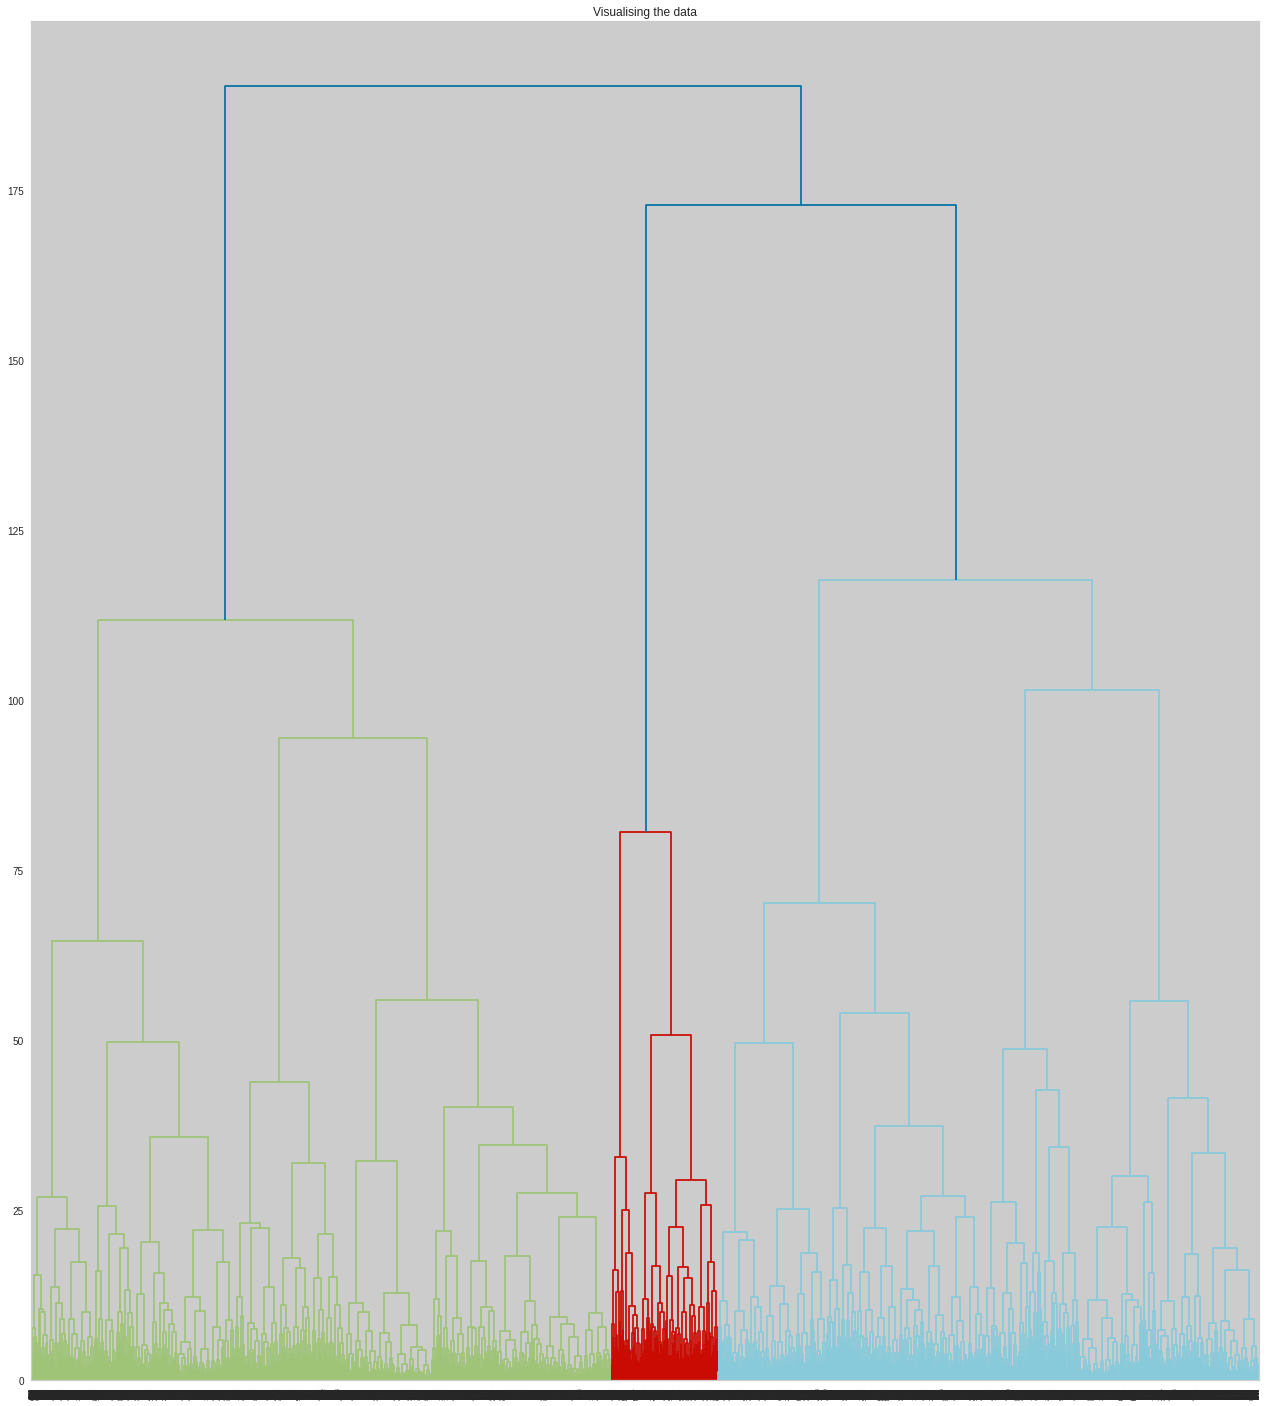

In [134]:
plt.figure(figsize =(22, 25)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(df_pca, method ='ward'))) 

### model evaluation

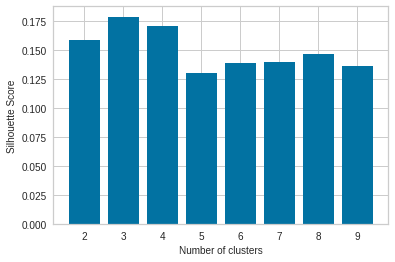

In [138]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 

silhouette_scores = [] 
for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(df_pca, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df_pca))) 
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9]
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 